# Testing differents ML models

#### Dans ce notebook, le but est de tester les mod√®les de sickit-learn pour trouver le meilleurs mod√®les sur nos donn√©es

## Chargement des donn√©es 

In [1]:
# Importing the librairies
import pandas as pd

# Exporting the csv file into a DataFrame pandas
chemin_fichier = "../data/data_cleaned.csv"
df = pd.read_csv(chemin_fichier)

In [2]:
# Convertir en entier puis extraire les deux derniers chiffres
df['arrondissement'] = df['code_postal'].astype(int) % 100

df.drop(columns="code_postal", inplace=True)
df.drop(columns='nom_commune', inplace=True)
df.drop(columns='adresse_nom_voie', inplace = True)
df.drop(columns='date_mutation', inplace=True)

In [3]:
df

adresse_numero  adresse_code_voie  lot1_surface_carrez  \
0                13.0             9002.0                61.00   
1                51.0             1880.0                40.66   
2               134.0             3933.0                32.52   
3                 9.0             3192.0                34.53   
4                18.0             4452.0                24.59   
...               ...                ...                  ...   
73658           161.0             2112.0                50.06   
73659            25.0             2523.0                10.00   
73660             9.0             6783.0                56.88   
73661            18.0             8436.0                85.05   
73662           113.0             9761.0                79.82   

       surface_reelle_bati  nombre_pieces_principales  longitude   latitude  \
0                     25.0                        2.0   2.348168  48.884490   
1                     42.0                        3.0   2.362871  48.863374   
2                     29.0                        1.0   2.405513  48.872782   
3                     36.0                        2.0   2.386648  48.869335   
4                     28.0                        2.0   2.400622  48.852508   
...                    ...                        ...        ...        ...   
73658                 52.0                        3.0   2.317308  48.891974   
73659                  9.0                        1.0   2.324411  48.884351   
73660                 55.0                        3.0   2.347625  48.867586   
73661                 84.0                        4.0   2.340259  48.892260   
73662                 80.0                        4.0   2.283203  48.868047   

         prix_au_m2  ann√©e  arrondissement  
0       9508.196721   2022              18  
1      14879.488441   2022               3  
2       9840.098401   2022              20  
3       6371.271358   2022              20  
4      11386.742578   2022              20  
...             ...    ...             ...  
73658   9622.453056   2023              17  
73659  10700.000000   2023              17  
73660  12798.874824   2023               2  
73661  11405.055850   2023              18  
73662  12349.135555   2023              16  

[73663 rows x 10 columns]

## S√©paration des donn√©es en train et test

In [4]:
from sklearn.model_selection import train_test_split

# On suppose que ta cible est dans la colonne 'prix_au_m2'
X = df.drop(columns='prix_au_m2')
y = df['prix_au_m2']

# S√©paration des donn√©es (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Partie 1 : Entrainement de diff√©nrents mod√®les lin√©aires

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Optionnel : mise √† l'√©chelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Liste des mod√®les lin√©aires √† tester
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "HuberRegressor": HuberRegressor()
}

# Boucle sur les mod√®les
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  R¬≤   : {r2:.4f}")
    print("-" * 30)


LinearRegression
  MAE  : 2260.31
  RMSE : 4824.94
  R¬≤   : 0.0946
------------------------------
Ridge
  MAE  : 2260.30
  RMSE : 4824.94
  R¬≤   : 0.0946
------------------------------
Lasso
  MAE  : 2260.28
  RMSE : 4824.94
  R¬≤   : 0.0946
------------------------------
ElasticNet
  MAE  : 2253.17
  RMSE : 4823.19
  R¬≤   : 0.0953
------------------------------
HuberRegressor
  MAE  : 2144.88
  RMSE : 4862.35
  R¬≤   : 0.0806
------------------------------


## Analyse des erreurs 

#### On a globalement de r√©sultat m√©diocre, les mod√®les pr√©disent √† peine mieux que juste la moyenne (R¬≤ proche de 0), et moins bien qu'un moyenne par arrondissment (cf notebook analyse-arrondissement), les MAE et RMSE sont assez cons√©quentes.

## Partie 2 : Entrainement d'arbre de d√©cision et for√™t al√©atoire

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Entra√Ænement de l‚Äôarbre
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

# Pr√©diction
y_pred = tree.predict(X_test)

# √âvaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R¬≤   : {r2:.4f}")


MAE : 1989.07
RMSE : 4295.43
R¬≤   : 0.2825


#### On a ici de bien meilleurs r√©sultats que pour les mod√®les lin√©aires, surement car il g√®re mieux les non lin√©arit√©s. Le mod√®le pr√©dis √©galement mieux que la baseline ainsi que la baseline par arrondissement , ce qui signifie qu'il prend donc en compte la rue en plus de l'arrondissement.

#### Faisons varier les hyperparam√®tres pour trouver la max_depth optimale

In [7]:
from tqdm import tqdm

# Dictionnaire pour stocker les erreurs
results = {
    'max_depth': [],
    'mae': [],
    'rmse': [],
    'r2': []
}

# Boucle sur diff√©rentes profondeurs d'arbre
for depth in tqdm(range(2, 31)):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Affichage des scores
    print(f"max_depth={depth} ‚Üí MAE={mae:.2f}, RMSE={rmse:.2f}, R¬≤={r2:.4f}")

    # Sauvegarde
    results['max_depth'].append(depth)
    results['mae'].append(mae)
    results['rmse'].append(rmse)
    results['r2'].append(r2)


  0%|          | 0/29 [00:00<?, ?it/s]

max_depth=2 ‚Üí MAE=2318.43, RMSE=4831.72, R¬≤=0.0921


  7%|‚ñã         | 2/29 [00:00<00:01, 15.53it/s]

max_depth=3 ‚Üí MAE=2256.69, RMSE=4756.43, R¬≤=0.1202
max_depth=4 ‚Üí MAE=2167.72, RMSE=4702.36, R¬≤=0.1401


 14%|‚ñà‚ñç        | 4/29 [00:00<00:02, 12.24it/s]

max_depth=5 ‚Üí MAE=2168.58, RMSE=4642.04, R¬≤=0.1620
max_depth=6 ‚Üí MAE=2136.52, RMSE=4562.21, R¬≤=0.1906


 21%|‚ñà‚ñà        | 6/29 [00:00<00:02,  9.42it/s]

max_depth=7 ‚Üí MAE=2099.71, RMSE=4468.38, R¬≤=0.2235
max_depth=8 ‚Üí MAE=2073.50, RMSE=4463.58, R¬≤=0.2252


 28%|‚ñà‚ñà‚ñä       | 8/29 [00:00<00:02,  7.49it/s]

max_depth=9 ‚Üí MAE=2048.21, RMSE=4399.20, R¬≤=0.2474


 31%|‚ñà‚ñà‚ñà       | 9/29 [00:01<00:03,  6.63it/s]

max_depth=10 ‚Üí MAE=1989.07, RMSE=4295.43, R¬≤=0.2825


 34%|‚ñà‚ñà‚ñà‚ñç      | 10/29 [00:01<00:03,  5.89it/s]

max_depth=11 ‚Üí MAE=1964.50, RMSE=4294.79, R¬≤=0.2827


 38%|‚ñà‚ñà‚ñà‚ñä      | 11/29 [00:01<00:03,  5.32it/s]

max_depth=12 ‚Üí MAE=1942.00, RMSE=4230.49, R¬≤=0.3040


 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 12/29 [00:01<00:03,  4.50it/s]

max_depth=13 ‚Üí MAE=1922.78, RMSE=4299.97, R¬≤=0.2809


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 13/29 [00:02<00:03,  4.18it/s]

max_depth=14 ‚Üí MAE=1949.21, RMSE=4468.20, R¬≤=0.2236


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 14/29 [00:02<00:03,  3.91it/s]

max_depth=15 ‚Üí MAE=1939.51, RMSE=4573.80, R¬≤=0.1864


 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 15/29 [00:02<00:03,  3.73it/s]

max_depth=16 ‚Üí MAE=1938.36, RMSE=4550.57, R¬≤=0.1947


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 16/29 [00:03<00:03,  3.55it/s]

max_depth=17 ‚Üí MAE=1944.93, RMSE=4754.56, R¬≤=0.1209


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 17/29 [00:03<00:03,  3.39it/s]

max_depth=18 ‚Üí MAE=1922.24, RMSE=4605.11, R¬≤=0.1753


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 18/29 [00:03<00:03,  3.02it/s]

max_depth=19 ‚Üí MAE=1920.78, RMSE=4651.18, R¬≤=0.1587


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 19/29 [00:04<00:03,  2.92it/s]

max_depth=20 ‚Üí MAE=1918.78, RMSE=4636.40, R¬≤=0.1640


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 20/29 [00:04<00:03,  2.82it/s]

max_depth=21 ‚Üí MAE=1908.30, RMSE=4670.65, R¬≤=0.1516


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 21/29 [00:05<00:02,  2.77it/s]

max_depth=22 ‚Üí MAE=1886.93, RMSE=4568.44, R¬≤=0.1883


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 22/29 [00:05<00:02,  2.72it/s]

max_depth=23 ‚Üí MAE=1892.51, RMSE=4630.69, R¬≤=0.1661


 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 23/29 [00:05<00:02,  2.66it/s]

max_depth=24 ‚Üí MAE=1882.32, RMSE=4665.35, R¬≤=0.1535


 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 24/29 [00:06<00:02,  2.48it/s]

max_depth=25 ‚Üí MAE=1873.93, RMSE=4642.16, R¬≤=0.1619


 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 25/29 [00:06<00:01,  2.46it/s]

max_depth=26 ‚Üí MAE=1868.39, RMSE=4673.17, R¬≤=0.1507


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 26/29 [00:07<00:01,  2.44it/s]

max_depth=27 ‚Üí MAE=1835.00, RMSE=4533.87, R¬≤=0.2006


 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 27/29 [00:07<00:00,  2.41it/s]

max_depth=28 ‚Üí MAE=1848.69, RMSE=4701.74, R¬≤=0.1403


 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 28/29 [00:07<00:00,  2.39it/s]

max_depth=29 ‚Üí MAE=1851.24, RMSE=4681.17, R¬≤=0.1478


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:08<00:00,  3.44it/s]

max_depth=30 ‚Üí MAE=1832.83, RMSE=4627.83, R¬≤=0.1671


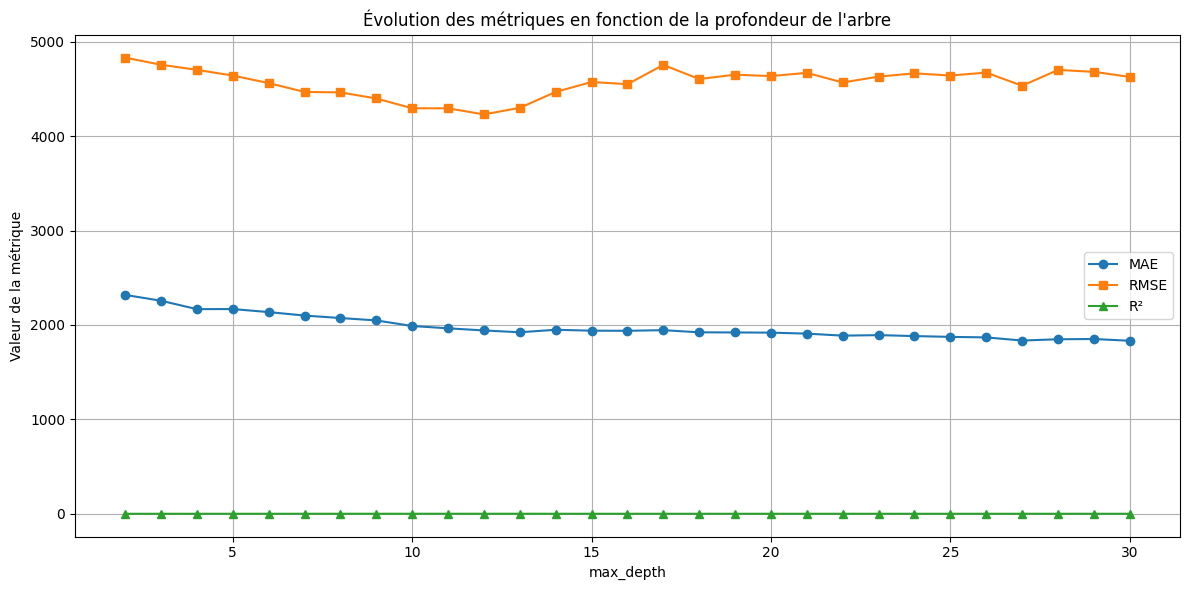

In [8]:
import matplotlib.pyplot as plt

# Trac√© des courbes
plt.figure(figsize=(12, 6))

# Courbes pour chaque m√©trique
plt.plot(results['max_depth'], results['mae'], label='MAE', marker='o')
plt.plot(results['max_depth'], results['rmse'], label='RMSE', marker='s')
plt.plot(results['max_depth'], results['r2'], label='R¬≤', marker='^')

# L√©gendes et axes
plt.xlabel('max_depth')
plt.ylabel('Valeur de la m√©trique')
plt.title("√âvolution des m√©triques en fonction de la profondeur de l'arbre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### variation en pourcetage

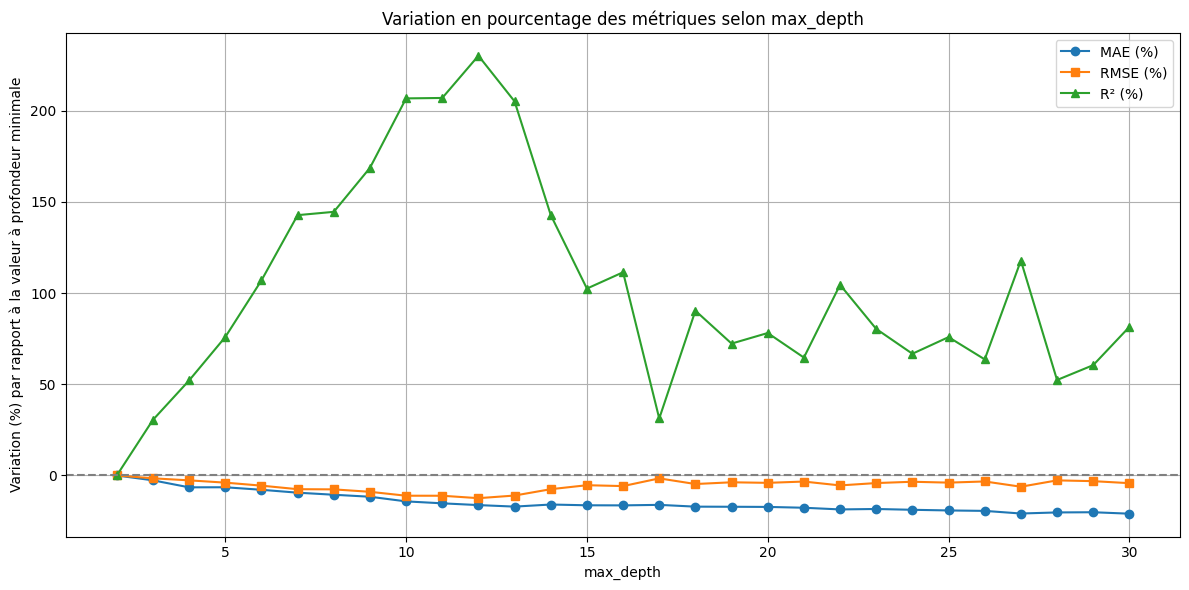

In [9]:
import matplotlib.pyplot as plt

# Calcul de la valeur initiale (profondeur minimale)
mae0 = results['mae'][0]
rmse0 = results['rmse'][0]
r2_0 = results['r2'][0]

# Calcul des variations en pourcentage
mae_pct = [(v - mae0) / mae0 * 100 for v in results['mae']]
rmse_pct = [(v - rmse0) / rmse0 * 100 for v in results['rmse']]
r2_pct = [(v - r2_0) / r2_0 * 100 for v in results['r2']]

# Trac√©
plt.figure(figsize=(12, 6))

plt.plot(results['max_depth'], mae_pct, label='MAE (%)', marker='o')
plt.plot(results['max_depth'], rmse_pct, label='RMSE (%)', marker='s')
plt.plot(results['max_depth'], r2_pct, label='R¬≤ (%)', marker='^')

plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('max_depth')
plt.ylabel('Variation (%) par rapport √† la valeur √† profondeur minimale')
plt.title("Variation en pourcentage des m√©triques selon max_depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### On obtient une valeur optimale de max_depth √† 12, que l'on va pouvoir tester sur une for√™t al√©atoire

#### Regardons les m√©triques pour une for√™ts al√©atoire

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Dictionnaire pour stocker les erreurs
results = {
    'n_estimators': [],
    'mae': [],
    'rmse': [],
    'r2': []
}

# Boucle sur diff√©rentes tailles de for√™ts
for n in tqdm(range(10, 210, 10)):  # de 10 √† 200 arbres
    rf = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Affichage des scores
    print(f"n_estimators={n} ‚Üí MAE={mae:.2f}, RMSE={rmse:.2f}, R¬≤={r2:.4f}")

    # Sauvegarde
    results['n_estimators'].append(n)
    results['mae'].append(mae)
    results['rmse'].append(rmse)
    results['r2'].append(r2)


  5%|‚ñå         | 1/20 [00:00<00:16,  1.14it/s]

n_estimators=10 ‚Üí MAE=1717.10, RMSE=3698.40, R¬≤=0.4681


 10%|‚ñà         | 2/20 [00:02<00:21,  1.18s/it]

n_estimators=20 ‚Üí MAE=1649.72, RMSE=3548.43, R¬≤=0.5103


 15%|‚ñà‚ñå        | 3/20 [00:04<00:24,  1.44s/it]

n_estimators=30 ‚Üí MAE=1626.44, RMSE=3514.55, R¬≤=0.5196


 20%|‚ñà‚ñà        | 4/20 [00:06<00:31,  1.96s/it]

n_estimators=40 ‚Üí MAE=1616.04, RMSE=3496.94, R¬≤=0.5244


 25%|‚ñà‚ñà‚ñå       | 5/20 [00:09<00:34,  2.33s/it]

n_estimators=50 ‚Üí MAE=1608.10, RMSE=3485.07, R¬≤=0.5277


 30%|‚ñà‚ñà‚ñà       | 6/20 [00:13<00:38,  2.76s/it]

n_estimators=60 ‚Üí MAE=1600.64, RMSE=3483.92, R¬≤=0.5280


 35%|‚ñà‚ñà‚ñà‚ñå      | 7/20 [00:17<00:40,  3.15s/it]

n_estimators=70 ‚Üí MAE=1593.60, RMSE=3476.45, R¬≤=0.5300


 40%|‚ñà‚ñà‚ñà‚ñà      | 8/20 [00:21<00:41,  3.49s/it]

n_estimators=80 ‚Üí MAE=1592.74, RMSE=3478.38, R¬≤=0.5295


 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 9/20 [00:26<00:43,  3.97s/it]

n_estimators=90 ‚Üí MAE=1589.12, RMSE=3475.44, R¬≤=0.5303


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 10/20 [00:31<00:43,  4.39s/it]

n_estimators=100 ‚Üí MAE=1585.22, RMSE=3470.19, R¬≤=0.5317


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 11/20 [00:37<00:43,  4.84s/it]

n_estimators=110 ‚Üí MAE=1584.46, RMSE=3469.78, R¬≤=0.5318


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 12/20 [00:44<00:44,  5.51s/it]

n_estimators=120 ‚Üí MAE=1583.23, RMSE=3471.06, R¬≤=0.5314


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 13/20 [00:52<00:42,  6.07s/it]

n_estimators=130 ‚Üí MAE=1582.57, RMSE=3468.69, R¬≤=0.5321


 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 14/20 [01:00<00:40,  6.72s/it]

n_estimators=140 ‚Üí MAE=1580.37, RMSE=3466.42, R¬≤=0.5327


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 15/20 [01:09<00:37,  7.50s/it]

n_estimators=150 ‚Üí MAE=1579.31, RMSE=3463.93, R¬≤=0.5334


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 16/20 [01:19<00:32,  8.22s/it]

n_estimators=160 ‚Üí MAE=1576.73, RMSE=3458.96, R¬≤=0.5347


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 17/20 [01:30<00:27,  9.00s/it]

n_estimators=170 ‚Üí MAE=1576.86, RMSE=3460.13, R¬≤=0.5344


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 18/20 [01:42<00:19,  9.82s/it]

n_estimators=180 ‚Üí MAE=1575.22, RMSE=3458.21, R¬≤=0.5349


 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 19/20 [01:53<00:10, 10.27s/it]

n_estimators=190 ‚Üí MAE=1574.59, RMSE=3456.89, R¬≤=0.5353


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [02:05<00:00,  6.25s/it]

n_estimators=200 ‚Üí MAE=1574.70, RMSE=3458.31, R¬≤=0.5349


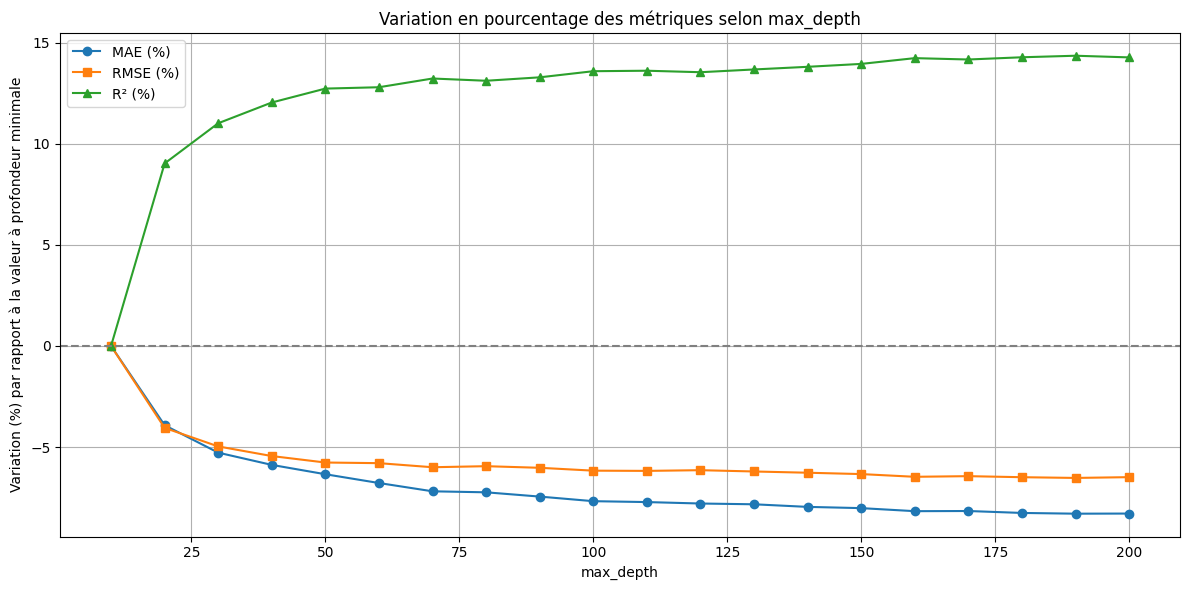

In [11]:
import matplotlib.pyplot as plt

# Calcul de la valeur initiale (profondeur minimale)
mae0 = results['mae'][0]
rmse0 = results['rmse'][0]
r2_0 = results['r2'][0]

# Calcul des variations en pourcentage
mae_pct = [(v - mae0) / mae0 * 100 for v in results['mae']]
rmse_pct = [(v - rmse0) / rmse0 * 100 for v in results['rmse']]
r2_pct = [(v - r2_0) / r2_0 * 100 for v in results['r2']]

# Trac√©
plt.figure(figsize=(12, 6))

plt.plot(results['n_estimators'], mae_pct, label='MAE (%)', marker='o')
plt.plot(results['n_estimators'], rmse_pct, label='RMSE (%)', marker='s')
plt.plot(results['n_estimators'], r2_pct, label='R¬≤ (%)', marker='^')

plt.axhline(0, color='gray', linestyle='--')

plt.xlabel('max_depth')
plt.ylabel('Variation (%) par rapport √† la valeur √† profondeur minimale')
plt.title("Variation en pourcentage des m√©triques selon max_depth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### On est ici bien meilleur que le decision tree, ce qui est logique, l'erreur R¬≤ est assez convaincante, de m√™me pour la MAE.

## Partie 3 : Boosting Models

In [16]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

models = {
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=200, learning_rate=0.9, max_depth=30),
    "HistGradientBoostingRegressor": HistGradientBoostingRegressor(max_iter=100)
}


# Boucle sur les mod√®les de boosting
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  R¬≤   : {r2:.4f}")
    print("-" * 30)


GradientBoostingRegressor
  MAE  : 1763.36
  RMSE : 4339.67
  R¬≤   : 0.2676
------------------------------
HistGradientBoostingRegressor
  MAE  : 2017.71
  RMSE : 4245.89
  R¬≤   : 0.2989
------------------------------


## Partie 4 : mod√®le KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


# normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for k in range(5,100,5):
    # Mod√®le KNN
    knn_model = KNeighborsRegressor(n_neighbors=k, weights='distance')  
    knn_model.fit(X_train_scaled, y_train)

    # Pr√©dictions
    y_pred = knn_model.predict(X_test_scaled)

    # √âvaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"k = {k}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  R¬≤   : {r2:.4f}")
    print("-" * 30)


k = 5
  MAE  : 1587.01
  RMSE : 4005.79
  R¬≤   : 0.3760
------------------------------
k = 10
  MAE  : 1530.20
  RMSE : 3880.78
  R¬≤   : 0.4143
------------------------------
k = 15
  MAE  : 1497.99
  RMSE : 3813.38
  R¬≤   : 0.4345
------------------------------
k = 20
  MAE  : 1485.38
  RMSE : 3788.88
  R¬≤   : 0.4417
------------------------------
k = 25
  MAE  : 1479.19
  RMSE : 3777.03
  R¬≤   : 0.4452
------------------------------
k = 30
  MAE  : 1476.99
  RMSE : 3775.27
  R¬≤   : 0.4457
------------------------------
k = 35
  MAE  : 1472.62
  RMSE : 3766.84
  R¬≤   : 0.4482
------------------------------
k = 40
  MAE  : 1466.28
  RMSE : 3755.68
  R¬≤   : 0.4515
------------------------------
k = 45
  MAE  : 1459.92
  RMSE : 3743.72
  R¬≤   : 0.4549
------------------------------
k = 50
  MAE  : 1457.20
  RMSE : 3736.14
  R¬≤   : 0.4571
------------------------------
k = 55
  MAE  : 1454.60
  RMSE : 3733.54
  R¬≤   : 0.4579
------------------------------
k = 60
  MAE  : 1452.8

## Partie 5 : r√©saux de Neurones

In [20]:
from sklearn.neural_network import MLPRegressor

# MLP = tr√®s sensible aux √©chelles ‚Üí normalisation indispensable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mod√®le MLP (r√©seau de neurones)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 64),  # 2 couches de 64 neurones
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Pr√©dictions
y_pred = mlp_model.predict(X_test_scaled)

# √âvaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MLPRegressor")
print(f"  MAE  : {mae:.2f}")
print(f"  RMSE : {rmse:.2f}")
print(f"  R¬≤   : {r2:.4f}")
print("-" * 30)


MLPRegressor
  MAE  : 2119.03
  RMSE : 4644.53
  R¬≤   : 0.1611
------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np

# ‚ö†Ô∏è MLP n√©cessite un scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Grille d'hyperparam√®tres √† tester
hidden_layer_options = [
    (32,), (64,), (128,),
    (64, 64), (128, 64), (128, 128)
]
activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01]
max_iters = [300, 500]

# Pour stocker les meilleurs r√©sultats
best_score = -np.inf
best_config = None

print("üîç Testing MLPRegressor configurations...\n")
for hl in tqdm(hidden_layer_options, desc="Hidden Layers"):
    for act in activations:
        for lr in learning_rates:
            for mi in max_iters:
                model = MLPRegressor(
                    hidden_layer_sizes=hl,
                    activation=act,
                    learning_rate_init=lr,
                    max_iter=mi,
                    random_state=42
                )

                try:
                    model.fit(X_train_scaled, y_train)
                    y_pred = model.predict(X_test_scaled)

                    mae = mean_absolute_error(y_test, y_pred)
                    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                    r2 = r2_score(y_test, y_pred)

                    print(f"Config: hl={hl}, act={act}, lr={lr}, max_iter={mi}")
                    print(f"  MAE  : {mae:.2f} | RMSE : {rmse:.2f} | R¬≤ : {r2:.4f}")
                    print("-" * 50)

                    if r2 > best_score:
                        best_score = r2
                        best_config = {
                            'hidden_layers': hl,
                            'activation': act,
                            'learning_rate': lr,
                            'max_iter': mi,
                            'mae': mae,
                            'rmse': rmse,
                            'r2': r2
                        }

                except Exception as e:
                    print(f"‚ö†Ô∏è Failed config: {hl}, {act}, {lr}, {mi} ‚Üí {e}")

# R√©sultat final
print("\n‚úÖ Best configuration found:")
print(best_config)


üîç Testing MLPRegressor configurations...



Hidden Layers:   0%|          | 0/6 [00:00<?, ?it/s]/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(32,), act=relu, lr=0.001, max_iter=300
  MAE  : 2232.43 | RMSE : 4781.35 | R¬≤ : 0.1109
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(32,), act=relu, lr=0.001, max_iter=500
  MAE  : 2219.22 | RMSE : 4769.02 | R¬≤ : 0.1155
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(32,), act=relu, lr=0.01, max_iter=300
  MAE  : 2108.27 | RMSE : 4697.10 | R¬≤ : 0.1420
--------------------------------------------------
Config: hl=(32,), act=relu, lr=0.01, max_iter=500
  MAE  : 2131.14 | RMSE : 4697.53 | R¬≤ : 0.1418
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(32,), act=tanh, lr=0.001, max_iter=300
  MAE  : 8416.51 | RMSE : 9824.74 | R¬≤ : -2.7538
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(32,), act=tanh, lr=0.001, max_iter=500
  MAE  : 6499.15 | RMSE : 8227.68 | R¬≤ : -1.6326
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(32,), act=tanh, lr=0.01, max_iter=300
  MAE  : 2158.88 | RMSE : 4711.67 | R¬≤ : 0.1367
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
Hidden Layers:  17%|‚ñà‚ñã        | 1/6 [01:38<08:11, 98.24s/it]

Config: hl=(32,), act=tanh, lr=0.01, max_iter=500
  MAE  : 2165.32 | RMSE : 4703.10 | R¬≤ : 0.1398
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64,), act=relu, lr=0.001, max_iter=300
  MAE  : 2196.59 | RMSE : 4754.63 | R¬≤ : 0.1208
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64,), act=relu, lr=0.001, max_iter=500
  MAE  : 2161.55 | RMSE : 4729.74 | R¬≤ : 0.1300
--------------------------------------------------
Config: hl=(64,), act=relu, lr=0.01, max_iter=300
  MAE  : 2111.44 | RMSE : 4690.99 | R¬≤ : 0.1442
--------------------------------------------------
Config: hl=(64,), act=relu, lr=0.01, max_iter=500
  MAE  : 2111.44 | RMSE : 4690.99 | R¬≤ : 0.1442
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64,), act=tanh, lr=0.001, max_iter=300
  MAE  : 5642.62 | RMSE : 7552.93 | R¬≤ : -1.2185
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64,), act=tanh, lr=0.001, max_iter=500
  MAE  : 2717.75 | RMSE : 5400.36 | R¬≤ : -0.1342
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64,), act=tanh, lr=0.01, max_iter=300
  MAE  : 2165.13 | RMSE : 4692.85 | R¬≤ : 0.1435
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
Hidden Layers:  33%|‚ñà‚ñà‚ñà‚ñé      | 2/6 [03:46<07:42, 115.65s/it]

Config: hl=(64,), act=tanh, lr=0.01, max_iter=500
  MAE  : 2169.34 | RMSE : 4684.30 | R¬≤ : 0.1467
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128,), act=relu, lr=0.001, max_iter=300
  MAE  : 2153.28 | RMSE : 4727.07 | R¬≤ : 0.1310
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128,), act=relu, lr=0.001, max_iter=500
  MAE  : 2125.02 | RMSE : 4714.24 | R¬≤ : 0.1357
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128,), act=relu, lr=0.01, max_iter=300
  MAE  : 2117.30 | RMSE : 4681.72 | R¬≤ : 0.1476
--------------------------------------------------
Config: hl=(128,), act=relu, lr=0.01, max_iter=500
  MAE  : 2104.40 | RMSE : 4676.61 | R¬≤ : 0.1495
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128,), act=tanh, lr=0.001, max_iter=300
  MAE  : 2519.89 | RMSE : 5084.01 | R¬≤ : -0.0052
--------------------------------------------------
Config: hl=(128,), act=tanh, lr=0.001, max_iter=500
  MAE  : 2616.70 | RMSE : 5071.76 | R¬≤ : -0.0004
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128,), act=tanh, lr=0.01, max_iter=300
  MAE  : 2144.14 | RMSE : 4670.92 | R¬≤ : 0.1515
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
Hidden Layers:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 3/6 [07:00<07:34, 151.54s/it]

Config: hl=(128,), act=tanh, lr=0.01, max_iter=500
  MAE  : 2145.67 | RMSE : 4663.69 | R¬≤ : 0.1542
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64, 64), act=relu, lr=0.001, max_iter=300
  MAE  : 2121.09 | RMSE : 4683.37 | R¬≤ : 0.1470
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64, 64), act=relu, lr=0.001, max_iter=500
  MAE  : 2119.03 | RMSE : 4644.53 | R¬≤ : 0.1611
--------------------------------------------------
Config: hl=(64, 64), act=relu, lr=0.01, max_iter=300
  MAE  : 2154.65 | RMSE : 4681.24 | R¬≤ : 0.1478
--------------------------------------------------
Config: hl=(64, 64), act=relu, lr=0.01, max_iter=500
  MAE  : 2154.65 | RMSE : 4681.24 | R¬≤ : 0.1478
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64, 64), act=tanh, lr=0.001, max_iter=300
  MAE  : 5670.81 | RMSE : 7574.68 | R¬≤ : -1.2313
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64, 64), act=tanh, lr=0.001, max_iter=500
  MAE  : 2729.08 | RMSE : 5410.21 | R¬≤ : -0.1383
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(64, 64), act=tanh, lr=0.01, max_iter=300
  MAE  : 2219.69 | RMSE : 4470.04 | R¬≤ : 0.2229
--------------------------------------------------


Hidden Layers:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 4/6 [11:01<06:14, 187.09s/it]

Config: hl=(64, 64), act=tanh, lr=0.01, max_iter=500
  MAE  : 2279.12 | RMSE : 4442.79 | R¬≤ : 0.2324
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 64), act=relu, lr=0.001, max_iter=300
  MAE  : 2108.36 | RMSE : 4663.11 | R¬≤ : 0.1544
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 64), act=relu, lr=0.001, max_iter=500
  MAE  : 2130.72 | RMSE : 4637.65 | R¬≤ : 0.1636
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 64), act=relu, lr=0.01, max_iter=300
  MAE  : 2208.46 | RMSE : 4509.25 | R¬≤ : 0.2092
--------------------------------------------------
Config: hl=(128, 64), act=relu, lr=0.01, max_iter=500
  MAE  : 2104.03 | RMSE : 4498.32 | R¬≤ : 0.2131
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 64), act=tanh, lr=0.001, max_iter=300
  MAE  : 5675.22 | RMSE : 7578.09 | R¬≤ : -1.2333
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 64), act=tanh, lr=0.001, max_iter=500
  MAE  : 2730.89 | RMSE : 5411.78 | R¬≤ : -0.1390
--------------------------------------------------
Config: hl=(128, 64), act=tanh, lr=0.01, max_iter=300
  MAE  : 2617.28 | RMSE : 5071.80 | R¬≤ : -0.0004
--------------------------------------------------


Hidden Layers:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 5/6 [15:45<03:41, 221.97s/it]

Config: hl=(128, 64), act=tanh, lr=0.01, max_iter=500
  MAE  : 2617.28 | RMSE : 5071.80 | R¬≤ : -0.0004
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 128), act=relu, lr=0.001, max_iter=300
  MAE  : 2142.56 | RMSE : 4663.04 | R¬≤ : 0.1544
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 128), act=relu, lr=0.001, max_iter=500
  MAE  : 2163.03 | RMSE : 4639.04 | R¬≤ : 0.1631
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 128), act=relu, lr=0.01, max_iter=300
  MAE  : 2092.00 | RMSE : 4275.77 | R¬≤ : 0.2890
--------------------------------------------------
Config: hl=(128, 128), act=relu, lr=0.01, max_iter=500
  MAE  : 2076.90 | RMSE : 4215.28 | R¬≤ : 0.3090
--------------------------------------------------


/Users/theodorefischer/Desktop/ENSTA/IA/IA26/nom_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Config: hl=(128, 128), act=tanh, lr=0.001, max_iter=300
  MAE  : 2513.76 | RMSE : 5087.66 | R¬≤ : -0.0066
--------------------------------------------------
Config: hl=(128, 128), act=tanh, lr=0.001, max_iter=500
  MAE  : 2616.85 | RMSE : 5071.77 | R¬≤ : -0.0004
--------------------------------------------------
Config: hl=(128, 128), act=tanh, lr=0.01, max_iter=300
  MAE  : 2618.05 | RMSE : 5071.86 | R¬≤ : -0.0004
--------------------------------------------------


Hidden Layers: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [21:34<00:00, 215.74s/it]

Config: hl=(128, 128), act=tanh, lr=0.01, max_iter=500
  MAE  : 2618.05 | RMSE : 5071.86 | R¬≤ : -0.0004
--------------------------------------------------

‚úÖ Best configuration found:
{'hidden_layers': (128, 128), 'activation': 'relu', 'learning_rate': 0.01, 'max_iter': 500, 'mae': 2076.898175426154, 'rmse': np.float64(4215.277856708687), 'r2': 0.30898648378056737}


## Conclusion : 

1. Les mod√®les lin√©aires sont mauvais  
2. Les arbres de d√©cision sont bons  
3. Les mod√®les boost sont bons  
4. Les mod√®les de KNN sont bons  
5. Les mod√®les MLP sont mauvais (ou bien trop complexe √† calibrer)